In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

#폰트 지정
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import mglearn

# Naive Bayes


+ 선형 모델과 유사 (LogisticRegression, LinearSVC,....)
+ 훈련 속도는 빠르지만 일반화 성능이 조금 뒤쳐진다. 
+ 종류
    - GaussianNB : 연속적인 데이터  
    - BernoulliNB : 이산 데이터 
    - MultinomialNB : 이산 데이터
    - 이산분류는 텍스트 분류할때 많이 쓰인다.
+ 파라미터 
    - alpha 

----
### 가우시안 나이브 베이즈

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
model = GaussianNB().fit(X_train, y_train)

In [23]:
pred = model.predict(X_test)

In [24]:
print("정확도 :", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정확도 : 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [26]:
confusion_matrix(y_test, pred)

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 11]], dtype=int64)

### 다항 분포 나이브베이즈(MultinomialNB)

+ 영화 리뷰를 이용한 평가 예측 (부정/긍정)

In [29]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]
df = pd.DataFrame(review_list)
df.head()

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive


In [30]:
# type 특성을 숫자로 매핑 
df["label"] = df["type"].map({"positive":1, "negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [32]:
df_X = df["movie_review"]
df_y = df["label"]

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
cv = CountVectorizer()
X_traincv = cv.fit_transform(df_X)
X_traincv

encoded_input = X_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [67]:
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [68]:
# 37개의 단어 
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [69]:
# 훈련 
from sklearn.naive_bayes import MultinomialNB

In [70]:
mnb = MultinomialNB().fit(X_traincv, df_y)

In [71]:
# 테스트 데이터 
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]
test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})
test_x = test_df["movie_review"]
test_y = test_df["label"]
test_df.head()

,movie_review,type,label
0,great great great movie ever,positive,1
1,I like this amazing movie,positive,1
2,my boyfriend said great movie ever,positive,1
3,cool cool cool,positive,1
4,awesome boyfriend said cool movie ever,positive,1


In [72]:

x_testcv = cv.transform(test_x)
pred= mnb.predict(x_testcv)

In [73]:
accuracy_score(test_y, pred)

1.0

### 베르누이 나이브 베이즈
- 스팸메일

In [94]:
from sklearn.naive_bayes import BernoulliNB

In [75]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

In [77]:
df = pd.DataFrame(email_list)
test_df = pd.DataFrame(test_email_list)

,email title,spam
0,free flight offer,True
1,hey traveler free flight deal,True
2,limited free game offer,True
3,today flight schedule,False
4,your credit card attached,False


In [82]:
df["label"] = df["spam"].map({True:1, False:0})
test_df["label"] = test_df["spam"].map({True:1, False:0})


In [83]:
df_X = df["email title"]
df_y = df["label"]
test_x = test_df["email title"]
test_y = test_df["label"]

In [84]:
cv = CountVectorizer()
X_traincv = cv.fit_transform(df_X)
X_traincv
x_testcv = cv.transform(test_x)


In [88]:
mnb = MultinomialNB().fit(X_traincv, df_y)

In [89]:
pred= mnb.predict(x_testcv)

In [90]:
accuracy_score(test_y, pred)

0.8333333333333334

In [95]:
bnb = BernoulliNB().fit(X_traincv, df_y)

In [98]:
pred_b = bnb.predict(x_testcv)

In [99]:
accuracy_score(test_y, pred)

0.8333333333333334

---
# K-MEANS

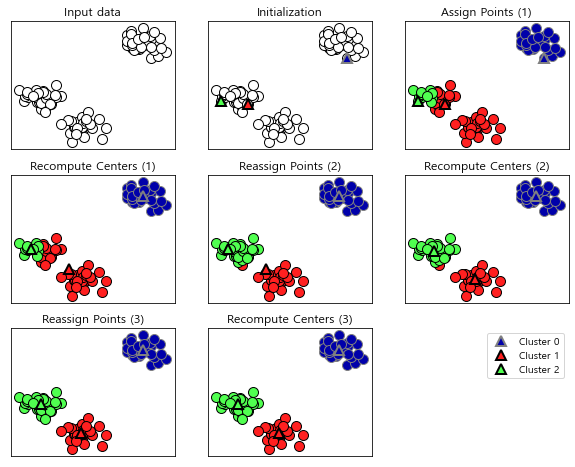

In [3]:
mglearn.plots.plot_kmeans_algorithm()

#### make_blobs() 샘플 활용

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [13]:
X, y = make_blobs()

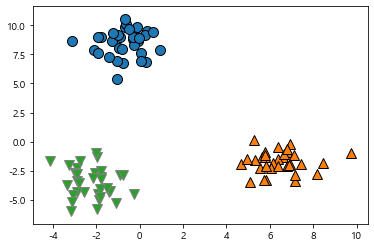

In [14]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [18]:
km = KMeans(n_clusters=3).fit(X) 
# n_clusters : cluster 갯수 
# 비지도학습이기 때문에 정답을 넘길수 없다.

In [21]:
lbl = km.labels_   
# 첫번째 집단은 0 / 두번째 집단은 1 / 3번째 집단은 2
# 단순히 구분하기 위해 나눈 것으로 실행할 때 마다 달라질 수 있다(랜덤이다)
# 정답을 모르기 때문에 숫자값으로 붙여주는 것이다. 

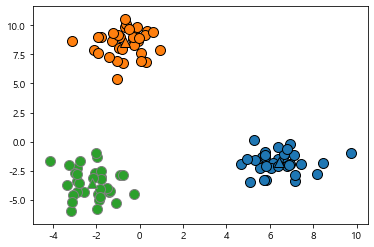

In [24]:
# 훈련 받은 것을 그래프로
mglearn.discrete_scatter(X[:,0], X[:,1], lbl, markers="o")
mglearn.discrete_scatter(km.cluster_centers_[:, 0], 
                        km.cluster_centers_[:, 1], [0, 1, 2], markers="^")

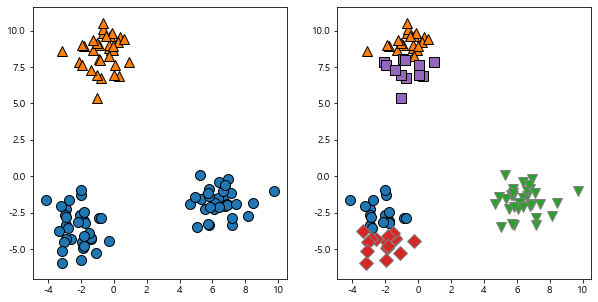

In [26]:
# 집단의 갯수를 2개로 했을때 5개로 했을 때
fig, axes = plt.subplots(1, 2, figsize=(10,5))
idx = 0 
for k in [2, 5]:
    km = KMeans(n_clusters=k).fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, ax=axes[idx])
    idx+=1

#### maek_moons 샘플 활용


In [60]:
# KMeans의 단점 복잡한 데이터 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise= 0.05, random_state=0)

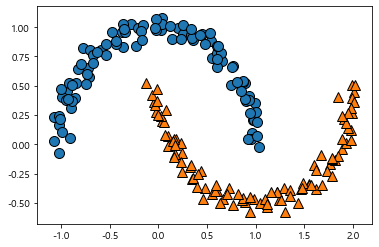

In [61]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [69]:
km = KMeans(n_clusters=2).fit(X)

In [70]:
#lbl = km.labels_           / km.labels = km.predixt(X) 실무에서는 predict 사용 
pred = km.predict(X)

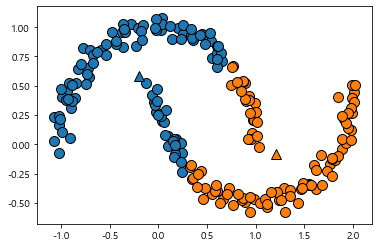

In [71]:
mglearn.discrete_scatter(X[:,0], X[:,1], pred, markers="o")
# 분류가 잘 못 되었다
mglearn.discrete_scatter(km.cluster_centers_[:, 0], 
                        km.cluster_centers_[:, 1], [0, 1], markers="^")
# KMEANS는 단순한 형태일 때 성능이 잘 나오지만 복잡한 데이터에서는 성능이 잘 나오지 않는다.

In [72]:
accuracy_score(pred, y)

0.755

#### iris 샘플 활용

In [81]:
from sklearn.datasets import load_iris

iris = load_iris()

X = pd.DataFrame(iris.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])

y = pd.DataFrame(iris.target, columns=["target"])

X.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽃잎')

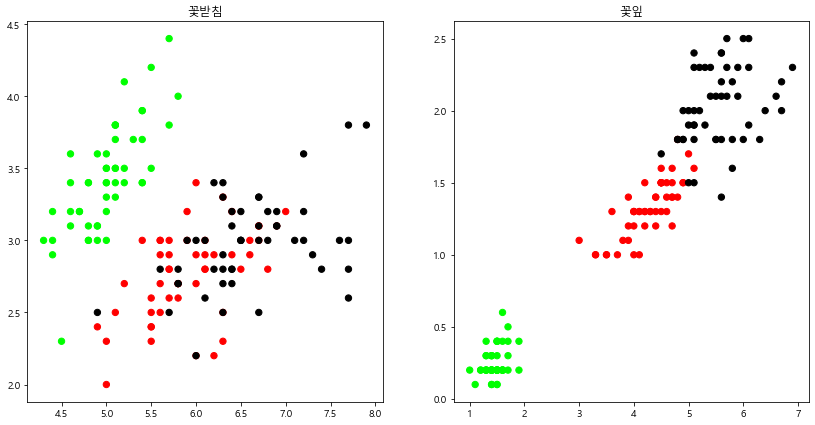

In [82]:
plt.figure(figsize = (14, 7))
colormap = np.array(["lime","red","black"])

plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽃잎")

In [87]:
km = KMeans(n_clusters=3).fit(X)

In [88]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '예측결과')

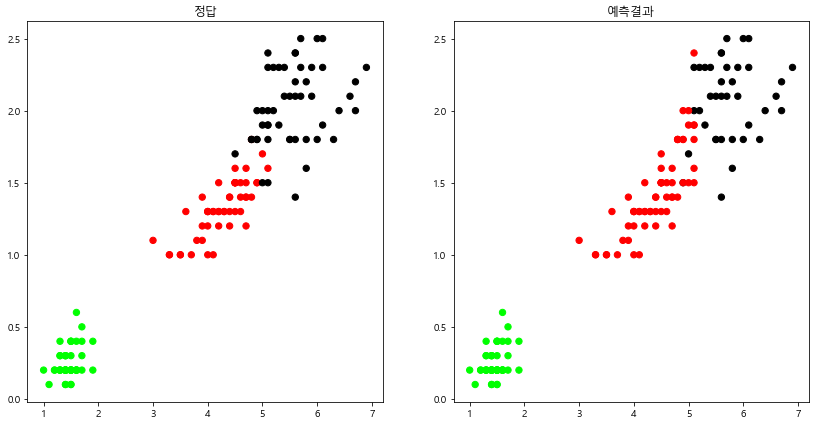

In [89]:
plt.figure(figsize = (14, 7))
colormap = np.array(["lime","red","black"])

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("정답")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[km.labels_], s=40)
plt.title("예측결과")

In [90]:
accuracy_score(y, km.labels_)

0.8933333333333333

In [91]:
confusion_matrix(y, km.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

#### 사람의 키와 몸무게 데이터 활용

In [115]:
df = pd.DataFrame(columns = ["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 65]
df.loc[2] = [185, 75]
df.loc[3] = [165, 50]
df.loc[4] = [170, 58]
df.loc[5] = [155, 60]
df.loc[6] = [157, 57]
df.loc[7] = [162, 62]
df.loc[8] = [173, 70]
df.loc[9] = [171, 70]

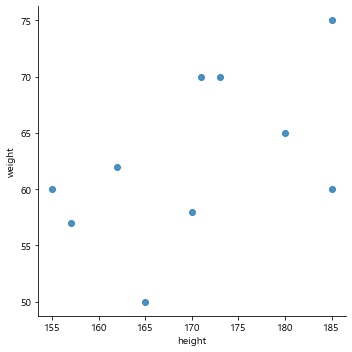

In [116]:
sns.lmplot("height", "weight", data=df, fit_reg=False)

In [118]:
km = KMeans(n_clusters=3).fit(df.values)

In [119]:
df["label"] = km.labels_
df

,height,weight,label
0,185,60,1
1,180,65,1
2,185,75,1
3,165,50,0
4,170,58,0
5,155,60,0
6,157,57,0
7,162,62,0
8,173,70,2
9,171,70,2


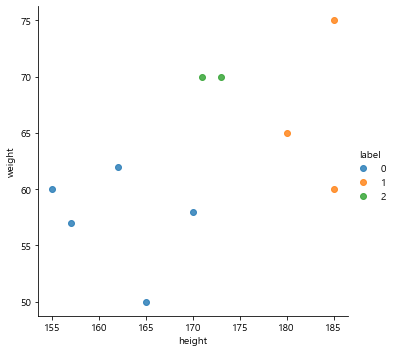

In [120]:
sns.lmplot("height", "weight", data=df, fit_reg=False, hue="label")

---
# 타이타닉을 이용한 알고리즘 성능 비교 

- https://www.kaggle.com/c/titanic

In [151]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2. EDA (탐색적 데이터 분석)

In [152]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [153]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [154]:
"""
- Pclass
- Sex
- SibSP
- Parch
- Embarked
    C : Cherbourg
    Q : Queenstown
    S : Southampton
- Cabin 
"""

'\n- Pclass\n- Sex\n- SibSP\n- Parch\n- Embarked\n    C : Cherbourg\n    Q : Queenstown\n    S : Southampton\n- Cabin \n'

In [155]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index= ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize = (10,5))

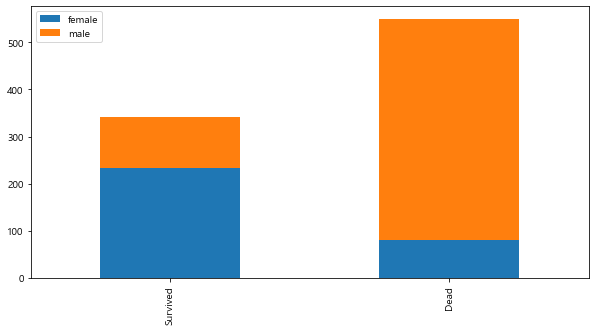

In [156]:
bar_chart("Sex") 
# 성별에 따른 생사여부의 차이가 있다. 새로운 데이터를 받았을 때 성별은 생사여부의 큰 영향을 줄 수 있다고 예측할 수 있다. 

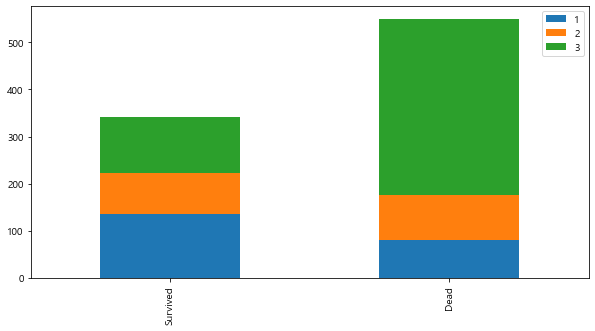

In [157]:
bar_chart("Pclass")


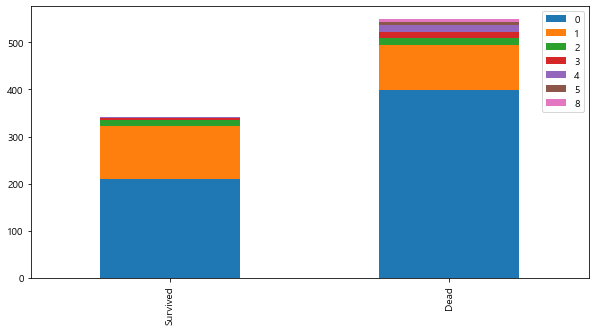

In [158]:
bar_chart("SibSp")
# 혼자탄 것보다 가족이 있는 경우가 생존할 가능성이 높다

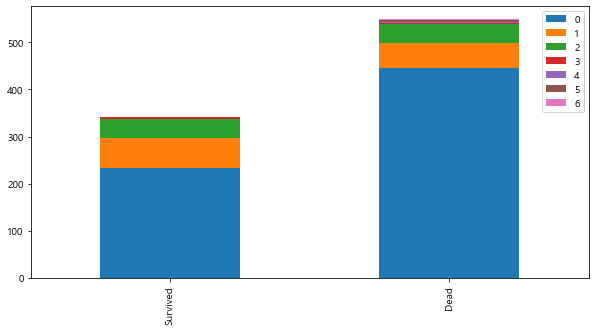

In [159]:
bar_chart("Parch")
# 혼자탔을때 더 많이 사망함

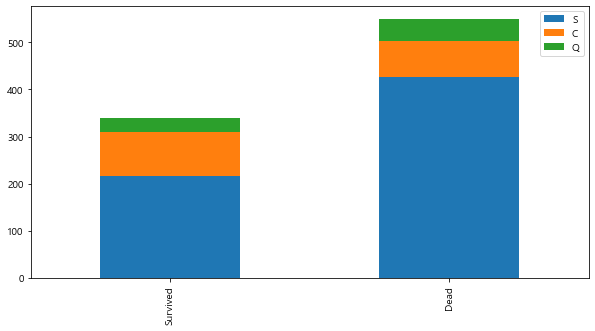

In [160]:
bar_chart("Embarked")
# 사우스햄튼에서 탑승한 사람은 죽은 사람이 더 많다.

### 3. Feature Engineering

In [161]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3-1)  Name 컬럼을 이용하여 호칭 (Mr, Mrs, Miss)을 추출


In [162]:
# 훈련 데이터와 테스트 데이터를 묶어서 한번에 처리
train_test_data = [train, test]

for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\. ")

In [163]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Ms            1
Capt          1
Sir           1
Jonkheer      1
Mme           1
Lady          1
Don           1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64


In [164]:
# 
title_mapping = {"Mr":0, "Miss" :1, "Mrs" :2, "Master" :3, "Dr":3,  "Rev":3, "Major":3, "Mlle":3, 
                 "Col":3, "Sir":3, "Lady":3, "Mme":3, "Countess":3, "Don":3, "Ms":3, "Jonkheer":3,
                 "Capt":3, "Dona":3}
for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [165]:
train.head()
train["Title"].value_counts()
test["Title"].value_counts()

0    240
1     78
2     72
3     28
Name: Title, dtype: int64

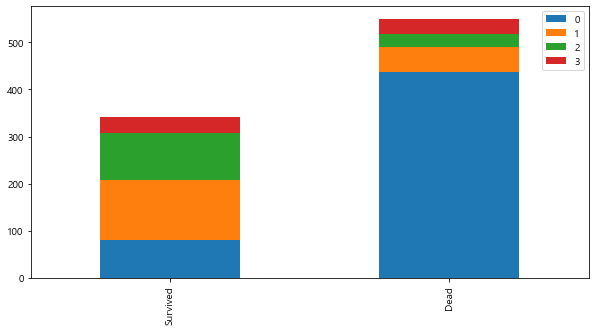

In [166]:
bar_chart("Title")

In [167]:
train.drop("Name", axis=1, inplace =True)
test.drop("Name", axis=1, inplace =True)

In [168]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


#### 3-2) Sex 데이터의 인코딩

In [169]:
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})

In [170]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


#### 3-3) Age 데이터의 Binning

+ child : 0, young : 1, adult :2, mid_age:3, senior:4 

+ child : 16세 이하 , young : 16 ~ 26, adult : 26 ~ 36, mid_age : 37 ~ 62, senior : 63세 이상

In [171]:
print(train.isnull().sum())
print("---------------------------------")
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
---------------------------------
PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [172]:
# 결측치 처리 : 평균나이로 대체
# 남성들은 Mr의 평균 나이, Mrs는 Mrs의 평균나이, Miss는 Miss의 평균나이
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [173]:
train.isnull().sum()
#test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [174]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[dataset["Age"]>=62, "Age"] = 4

In [175]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


#### 3-4) Embarked 데이터 결측치 처리, 인코딩

In [176]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [177]:
train["Embarked"].value_counts()
# S가 가장 많으므로 결측치는 S 로처리

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [178]:
train["Embarked"].fillna("S", inplace=True)

In [179]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [180]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1 , "Q":2})

In [181]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [182]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2


#### 3-5) Fare 데이터의 결측치 처리, Binning

+ 17이하이면 0, 18 ~ 30 이면 1, 31~ 100 이면 2, 그 이상은 3

In [183]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [184]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [185]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"]<=17, "Fare"] = 0
    dataset.loc[(dataset["Fare"]>17) & (dataset["Fare"]<=30), "Fare"] = 1
    dataset.loc[(dataset["Fare"]>30) & (dataset["Fare"]<=100), "Fare"] = 2
    dataset.loc[dataset["Fare"]>100, "Fare"]  = 3

In [189]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


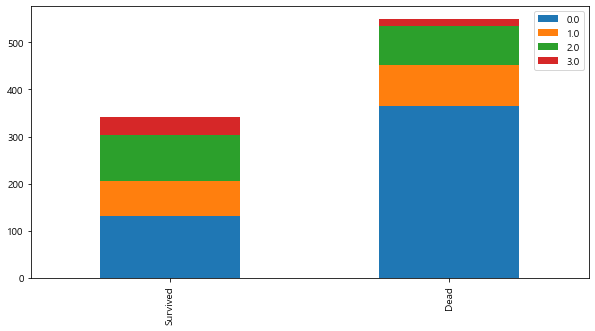

In [187]:
bar_chart("Fare")

In [188]:
print(train["Fare"].value_counts())

0.0    496
2.0    181
1.0    161
3.0     53
Name: Fare, dtype: int64


#### 3-6) cabin 데이터 처리

In [191]:
train.Cabin.value_counts()
# 뒤에 숫자는 제외하고 알파벳만 뽑아오기 

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
D              3
              ..
B38            1
B73            1
B79            1
E46            1
D19            1
Name: Cabin, Length: 147, dtype: int64

In [192]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

In [193]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


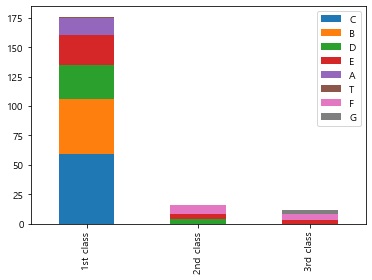

In [195]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=["1st class","2nd class","3rd class"]
df.plot(kind="bar", stacked= True)

In [196]:
# Cabin 알파벳을 숫자로 
cabin_mapping={"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [197]:
train["Cabin"].value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [198]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [199]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [201]:
train["Cabin"].isnull().sum()
test["Cabin"].isnull().sum()

0

In [202]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


#### 3-7) SibSp, Parch 데이터 처리 (동승자 컬럼 합치기)

In [203]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [204]:
train["FamilySize"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

#### 3-8) 필요없는 컬럼 삭제

In [205]:
feature_drop = ["Ticket", "SibSp", "Parch"]
train = train.drop(feature_drop, axis=1)
test = test.drop(feature_drop, axis= 1)

In [207]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,2.0,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,2.0,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


In [208]:
# 훈련데이터에는 독립변수들만 모아서 제공해줘야 한다. 
train = train.drop(["PassengerId"], axis=1)

In [209]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [210]:
print(X.shape, y.shape)

(891, 8) (891,)


In [211]:
# 체크포인트 
X.to_csv("data/titanic/train_data.csv", index=False)
y.to_csv("data/titanic/target.csv", index=False)

In [253]:
test.to_csv("data/titanic/test.csv", index=False)

### 4. Modeling

+ KNN
+ Decision Tree
+ Random Forest
+ SVM
+ Naive Bayes

In [213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [216]:
X = pd.read_csv("data/titanic/train_data.csv")
y = pd.read_csv("data/titanic/target.csv")

In [219]:
X.head()
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [220]:
?KFold

In [223]:
# 데이터를 몇등분으로 나눌 것인 가
kfold = KFold(n_splits=10, shuffle=True, random_state=0) 
# kfold를 나중에 cross_val_score에 넘겨주면 된다.

In [242]:
# KNN

knnclf = KNeighborsClassifier(n_neighbors=26) 
score = cross_val_score(knnclf, X, np.ravel(y), cv=kfold, scoring="accuracy") # y값을 1차원으로 바꿔주어야 한다.

print(score)
round(np.mean(score)*100,2)

[0.82222222 0.82022472 0.83146067 0.82022472 0.83146067 0.82022472
 0.82022472 0.79775281 0.83146067 0.82022472]


82.15

In [243]:
# Decision Tree
dtclf = DecisionTreeClassifier() 
score = cross_val_score(dtclf, X, np.ravel(y), cv=kfold, scoring="accuracy") 

print(score)
round(np.mean(score)*100,2)

[0.78888889 0.88764045 0.75280899 0.7752809  0.86516854 0.78651685
 0.79775281 0.79775281 0.74157303 0.80898876]


80.02

In [249]:
# RandomForest
rfclf = RandomForestClassifier(n_estimators=300)
score = cross_val_score(rfclf, X, np.ravel(y), cv=kfold, scoring="accuracy") 

print(score)
round(np.mean(score)*100,2)

[0.82222222 0.85393258 0.80898876 0.79775281 0.88764045 0.82022472
 0.82022472 0.78651685 0.7752809  0.84269663]


82.15

In [250]:
# NaiveBayes 
nbclf = GaussianNB()
score = cross_val_score(nbclf, X, np.ravel(y), cv=kfold, scoring="accuracy") 

print(score)
round(np.mean(score)*100,2)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


78.78

In [251]:
# SVM 
svmclf = SVC()
score = cross_val_score(svmclf, X, np.ravel(y), cv=kfold, scoring="accuracy") 

print(score)
round(np.mean(score)*100,2)

[0.83333333 0.78651685 0.82022472 0.82022472 0.84269663 0.80898876
 0.82022472 0.84269663 0.83146067 0.85393258]


82.6

### 5. Testing

In [254]:
test.head()
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [255]:
clf = SVC()
clf.fit(X, y)

C:\Users\Master\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [256]:
test_data = test.drop("PassengerId", axis= 1).copy() 

In [258]:
test_data.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,2.0,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,2.0,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


In [259]:
pred = clf.predict(test_data)

In [260]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [261]:
submission.to_csv("data/titanic/submission.csv", index=False)

In [ ]:
# 전처리나 튜닝을 통해 최적의 파라미터를 찾아 정확도 올리기